In [2]:
# Por si alguien corre en python2
from __future__ import division

# Preparamos todo para correr
import numpy as np
from math import *
from matplotlib import pylab as plt
%matplotlib inline

## Inferencia Bayesiana

Dijimos que el teorema de Bayes funciona como un modelo del proceso de aprendizaje: el conocimiento inicial sobre un proposición lógica (digamos, para precisar ideas, el valor de un parámetro, $\theta$ ) se codifica en el prior $P(\theta)$. Con la obtención de una serie de datos, $D$, el prior se convierte en la distribución posterior, $P(\theta | D)$, que contiene toda la información que los datos proveen sobre este parámetro. La transformación la provoca la distribución $P(D | \theta)$, que como función de $\theta$ se llama función verosimilitud.

$$
P(\theta | D) \propto P(D | \theta)P(\theta)\;\;.
$$

Para precisar las ideas, vamos a resolver algunos puntos del ejercicio 4 de la [Guía de Inferencia Bayesiana](Ejercicios_03_InferenciaBayesiana.ipynb). El enunciado dice así:

<blockquote>Considerar una moneda de la que no se tiene ninguna información acerca de su estado. Es decir, no se sabe si la moneda está trucada, si cae preferentemente de un lado o del otro. Se quiere determinar la probabilidad, $\mu$, de que la moneda caiga de uno de los lados (digamos cara).</blockquote>

En otras palabras, buscamos la distribución posterior de $\mu$ dada una serie de datos, que llamaremos $D = {x_1, x_2, ..., x_n}$:

$$
p(\mu | D) = \frac{p(D | \mu) p(\mu)}{p(D)}
$$

### Prior

El primer punto pregunta cuál sería un prior razonable para el parámetro $\mu$ dada esta información.

Si hay tiempo, hablaremos de los <b>priors de ignorancia</b>, y cómo surgen naturalmente de imponer que las distribuciones tienen que tener ciertas propiedades de simetría. Por ahora, simplemente veamos que los valores extremos del parámetro $\mu$ tienen que ser 0 y 1, y que no debería haber preferencia por ninguno de los valores intermedios. Es decir, un prior razonable sería una distribución uniforme entre 0 y 1. 

Una forma práctica de codificar esto es a través de la función $\mathrm{Beta}$:

$$
\mathrm{Beta}(\mu | a, b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}\;\;,
$$

donde $\Gamma(x) \equiv \int_0^\infty u^{x-1}e^{-u}\mathrm{d}u$ es la función Gamma, que está implementada en el subpaquete <tt>scipy.special</tt>. 

Algunas propiedades de la función $\mathrm{Beta}$:

$$
\mathbb{E[\mu]} = \frac{a}{a+b}
$$

$$
\mathrm{var}[\mu] = \frac{ab}{(a+b)^2(a+b+1)}
$$

La función $\mathrm{Beta}$ está implementada en <tt>scipy.stats.beta</tt>. Podemos graficar la función para algunos valores de $a$ y $b$.

Text(0.5, 0, '$\\mu$')

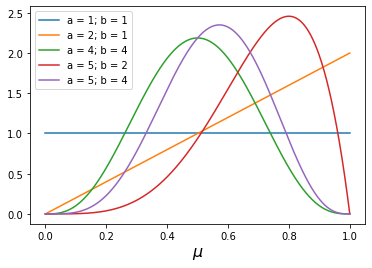

In [3]:
from scipy.stats import beta

# La función Beta está definida entre 0 y 1
x = np.linspace(0, 1, 1000)

# Todas las distribuciones implementadas en scipy.stats tienen un método pdf o pmf que calcula
# la densidad o la masa, respectivamente, para valores de x.
plt.plot(x, beta(1, 1).pdf(x), label='a = 1; b = 1')
plt.plot(x, beta(2, 1).pdf(x), label='a = 2; b = 1')
plt.plot(x, beta(4, 4).pdf(x), label='a = 4; b = 4')
plt.plot(x, beta(5, 2).pdf(x), label='a = 5; b = 2')
plt.plot(x, beta(5, 4).pdf(x), label='a = 5; b = 4')

plt.legend(loc=0)
plt.xlabel('$\mu$', fontsize=16)

Podemos ver de la definición y del gráfico, que la distribución uniforme es un caso particular de la $\mathrm{Beta}$, con parámetros $a=b=1$. Elegimos, entonces, la distribución prior de $\mu$, $p(\mu) = \mathrm{Beta}(\mu | a=1, b=1)$

### Verosimilitud

El segundo elemento necesario para calcular la distribución posterior es la función verosimilitud. Para eso, consideremos los datos $D$. Cada tirada $x_i$ de la moneda puede tener dos resultados (en otras palabras, el espacio de muestreo tiene dos elementos): puede ser $x_i = 1$ para cara y $x_i = 0$ para ceca.

La función de distribución que define el resultado de una tira de la moneda es la distribución de Bernoulli:

$$
\mathrm{Bern}(x|\mu) = \mu^x (1 - \mu)^x\;\;.
$$

Es decir, la probabilidad de que la moneda caiga del lado de cara es $\mathrm{Bern}(x=1|\mu)=\mu$, y por lo tanto, la probabilidad de que sea ceca es $\mathrm{Bern}(x=0|\mu)= 1-\mu$.

Si ahora consideramos la totalidad de las observaciones, $D = \{x_1, x_2, ..., x_N\}$ y suponemos que las tiradas son independientes, podemos calcular la verosimulitud como:

\begin{equation}
P(D|\mu) = P(x_1|\mu)P(x_2|\mu)...P(x_N|\mu) = \prod_{i=1}^{N}P(X_i|\mu)= \prod_{i=1}^{N}\mathrm{Bern}(X_i|\mu)
\end{equation}

Tenemos, entonces:
$$
P(D|\mu) = \prod_{i=1}^{N}\mu^{x_i}(1 - \mu)^{1-x_i}\;\;.
$$

También es interesante ver la función $\ln{P(D|\mu)}$, que en muchos casos es más práctica que la verosimilitud:

$$
\ln{P(D|\mu)} = \sum_{i=1}^N \left[x_i \ln{\mu} + (1 - x_i) \ln{(1-\mu)}\right]\;\;,
$$

de donde podemos encontrar el máximo igualando la derivada de $\ln{P(D|\mu)}$ con respecto a $\mu$ a cero. El valor de $\mu$ donde se alcanza el máximo es el estimador de máxima verosimilitud (ML):
$$
\mu_\mathrm{ML} = \frac{1}{N}\sum_{i=1}^N x_i\;\;,
$$
es decir, la fracción de veces que la moneda cae del lado de cara:
$$
\mu_\mathrm{ML} = \frac{c}{N}\;\;.
$$
En este punto, tomemos un minuto para discutir cómo son las predicciones del modelo si los datos son $D = \{1, 1, 1\}$.

Ahora bien, si las tiradas de las monedas son independientes, la verosimilitud tiene que ser invariante frente a reordenamientos de los índices del conjunto $D$. Es decir, no debería importar en qué orden salieron los resultados de las tiradas. En efecto, vemos que el logaritmo de la verosimilitud sólo depende de la suma de las $x_i$, lo que es igual a decir que depende del número de veces que se obtuvo cara. 

Podemos entonces escribir la función de distribución del número de veces que la moneda cae cara, $c$, que depende del parámetro $\mu$ y del número total de tiradas:

$$
P(c|N, \mu) = {N\choose c}\mu^c(1-\mu)^{N-c}\;\;,
$$
que se conoce como la distribución Binomial, $\mathrm{Bin(c|N, \mu)}$. La expresión de arriba puede deducirse de la distribución de Bernoulli, y de considerar las posibles maneras que hay de obtener $c$ caras en $N$ intentos.

Como buena distribución, la Binomial está normalizada. Su esperanza y varianza son:

$$
\mathbb{E[\mu]} = N\mu\;\;,
$$
lo cual tiene todo el sentido del mundo, y 

$$
\mathrm{var}[\mu] = N\mu(1-\mu)\;\;.
$$

Vemos también que la distribución binomial, a menos de una constante de normalización, es idéntica a la función de verosimilitud escrita arriba.

### Posterior

Para calcular el posterior, vamos a hacer uso de una propiedad de la distribución Binomial: el <b>prior conjugado</b> de esta distribución es la distribución $\mathrm{Beta}$. Esto quiere decir, que si tengo una verosimilitud binomial, y un prior Beta, la distribución posterior también será Beta.

En este caso, es fácil ver que la Beta y la Binomial tienen la misma pinta en cuanto a los términos que contienen a $\mu$. Manteniendo solo los términos que no son constantes en este parámetro:

$$
P(\mu | D) \propto \left[\mu^c(1-\mu)^e\right]\times\left[\mu^{a-1}(1-\mu)^{b-1}\right] = \mu^{c + a - 1}(1-\mu)^{e + b - 1} \propto \mathrm{Beta}(\mu | c + a, e + b)\;\;.
$$

Es decir, que la posterior es una Beta, en la que los (hiper-)parámetros se modifican con respecto al prior sumándole el número de caras al parámetro $a$ y el número de cecas al parámetro $b$.

Vamos a ver ahora cómo queda la posterior frente a la serie de tiradas [E, E, C, E, C]. Vemos que el número de caras es 2 y el número de cecas es 3. Por lo tanto, podemos graficar el prior y el posterior fácilmente:

Text(0.5, 0, '$\\mu$')

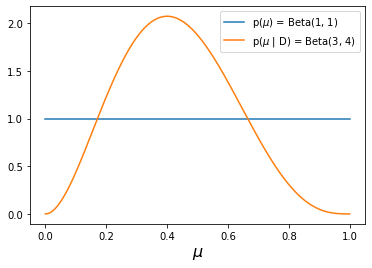

In [4]:
# Todas las distribuciones implementadas en scipy.stats tienen un método pdf o pmf que calcula
# la densidad o la masa, respectivamente, para valores de x.
plt.plot(x, beta(1, 1).pdf(x), label='p($\mu$) = Beta(1, 1)')
plt.plot(x, beta(3, 4).pdf(x), label='p($\mu$ | D) = Beta(3, 4)')

plt.legend(loc=0)
plt.xlabel('$\mu$', fontsize=16)

Vamos a jugar ahora con un gran número de mediciones.

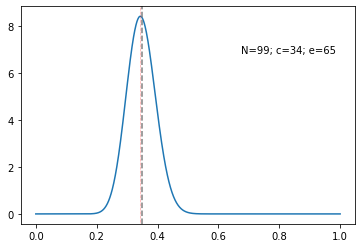

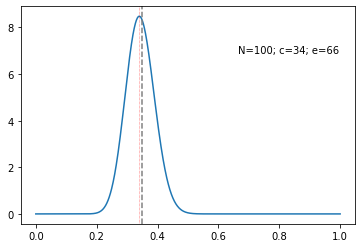

In [5]:
import time
from IPython import display
import numpy.random as rr

# El paquete en el que están implementadas muchas funciones de distribución es scipy.stats
import scipy.stats as st

# Genera los puntos para graficar la curva.
x = np.linspace(0, 1, 1000)

# Define el mu verdadero
mu_t = 0.35

# Define número de tiradas
N = 100

# Genera al azar 100 tiradas de una moneda con mu = 0.5.
t = np.where(rr.rand(N) < mu_t, 1, 0)

# Inicializa los contadores de las caras y las cecas
m = 0
l = 0

# Define el tiempo de espera máximo y mínimo
tmin = 10/N
tmax = 0.5
tsleep = np.logspace(log(1), log(0.1), len(t))

# Grafica el prior
plt.plot(x, st.beta(1, 1).pdf(x))
plt.axvline(mu_t, color='0.5', ls='--')
plt.axvline(0, color='r', ls=':', lw=0.5)

ax = plt.gca()
ax.text(0.8, 0.8,'N=0; c=0; e=0', transform=ax.transAxes, va='center', ha='center')

# sleep
time.sleep(tmax)

for i, tt in enumerate(t):
    
    # Force plot display
    display.clear_output(wait=True)
    display.display(plt.gcf())

    if tt == 1:
        m += 1
    elif tt == 0:
        l += 1

    posterior = st.beta(1+m, 1+l)
    ax = plt.gca()
    ax.lines[0].set_ydata(posterior.pdf(x))
    ax.lines[-1].set_xdata([m/(i+1)]*2)
    
    # Update scale
    ax.relim()
    ax.autoscale_view(True,True,True)
    
    # Update text
    ax.texts[0].set_text('N={}; c={}; e={}'.format(str(i+1), str(m), str(l)))
    
    time.sleep(tsleep[i])
    #plt.clf()

***

### Preguntas

<ul>    <li> ¿Cómo hacemos para detectar una moneda no equilibrada?</li>
    <li> Simular una tirada con una moneda con un $\mu$ distinto de 0.5; y evaluar en qué momento (es decir, para cuántas tiradas de la moneda), el valor $\mu = 0.5$ queda descartado. ¿Cuál es el criterio a usar? <b>Idea:</b> Usar la masa encerrada entre el pico y el valor $\mu=0.5$</li>
    </ul>